In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
!ls

drive  sample_data


In [9]:
%cd IFP

/content/drive/My Drive/IFP


In [1]:
%cd drive/MyDrive/IFP

/content/drive/MyDrive/IFP


In [11]:
!git clone https://github.com/ria-com/nomeroff-net.git

Cloning into 'nomeroff-net'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 3748 (delta 52), reused 68 (delta 26), pack-reused 3639
Receiving objects: 100% (3748/3748), 276.24 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (2236/2236), done.
Checking out files: 100% (168/168), done.


In [2]:
%cd nomeroff-net/

/content/drive/My Drive/IFP/nomeroff-net


In [3]:
!pip3 install -r requirements.txt

In [4]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

# Import all necessary libraries.
import numpy as np
import sys
import cv2

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')

sys.path.append(NOMEROFF_NET_DIR)

# Import license plate recognition tools.
from NomeroffNet.YoloV5Detector import Detector
detector = Detector()
detector.load()

from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints
npPointsCraft = NpPointsCraft()
npPointsCraft.load()

from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

from NomeroffNet import TextDetector
from NomeroffNet import textPostprocessing

Instructions for updating:
non-resource variables are not supported in the long term


AttributeError: module 'keras.backend' has no attribute 'eager'

In [ ]:
 !ls ../nomeroff-net-master/examples/images/example1.jpeg

In [9]:
!ls

banchmarks     docs	   logs		public		  tools
CRAFT-pytorch  examples    models	README.md	  train
datasets       History.md  moderation	requirements.txt  yolov5
docker	       LICENSE	   NomeroffNet	setup.py


In [5]:
optionsDetector = OptionsDetector()
optionsDetector.load("latest")

textDetector = TextDetector.get_static_module("eu")()
textDetector.load("latest")

# Detect numberplate
img_path = "./examples/images/example2.jpeg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

targetBoxes = detector.detect_bbox(img)
all_points = npPointsCraft.detect(img, targetBoxes,[5,2,0])

# cut zones
zones = convertCvZonesRGBtoBGR([getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points])

# predict zones attributes 
regionIds, stateIds, countLines = optionsDetector.predict(zones)
regionNames = optionsDetector.getRegionLabels(regionIds)

# find text with postprocessing by standart
textArr = textDetector.predict(zones)
textArr = textPostprocessing(textArr, regionNames)
print(textArr)
# ['JJF509', 'RP70012']

['RP70012', 'JJF509']


In [6]:
from google.colab.patches import cv2_imshow

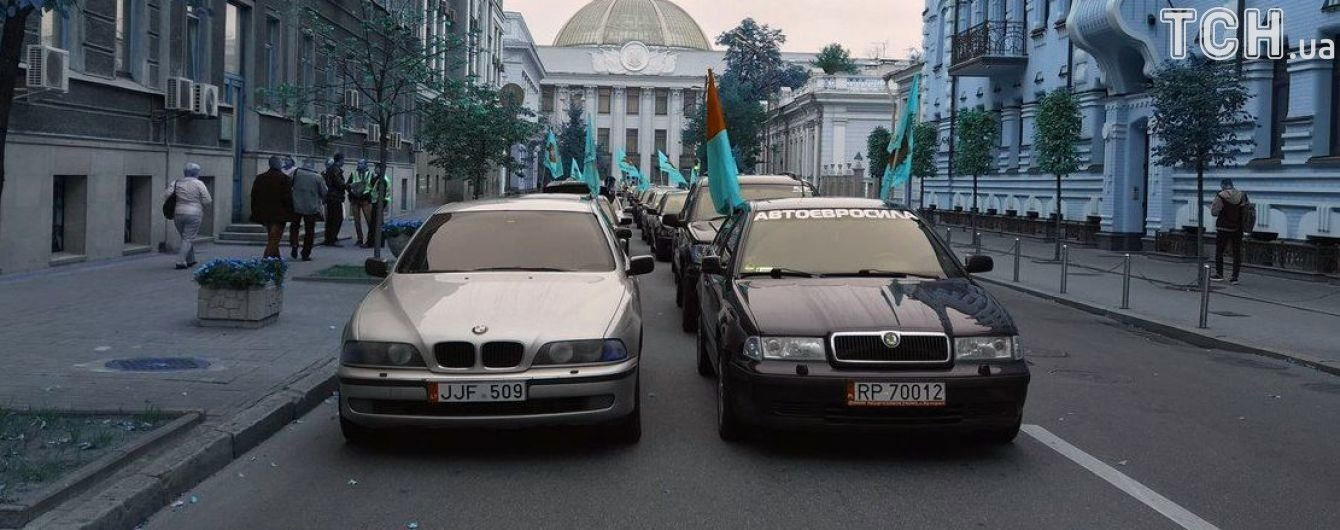

In [7]:
cv2_imshow(img)

In [ ]:
inference.py

args - image path

!py